<a href="https://colab.research.google.com/github/Ragini31Rana/Waste-classification/blob/main/waste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

---

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math

Acessing the google drive

---


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Defining the path of the data in google drive

---

In [3]:
DIR1 = "/content/drive/MyDrive/Colab Notebooks/train data"
DIR2 = "/content/drive/MyDrive/Colab Notebooks/test data"

Defining the train and test data

---

In [4]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR1,
                                                                        validation_split=0.1,
                                                                        subset="training",
                                                                        seed=42,
                                                                        batch_size=128,
                                                                        smart_resize=True,
                                                                        image_size=(256, 256))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR2,
                                                                       validation_split=0.1,
                                                                       subset="validation",
                                                                       seed=42,
                                                                       batch_size=128,
                                                                       smart_resize=True,
                                                                       image_size=(256, 256))

Found 6612 files belonging to 9 classes.
Using 5951 files for training.
Found 1759 files belonging to 9 classes.
Using 175 files for validation.


Defining the classes

---

In [5]:
classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)
AUTOTUNE = tf.data.AUTOTUNE

['batteries', 'clothes', 'e-waste', 'glass', 'light blubs', 'metal', 'organic', 'paper', 'plastic']


Auto tuning the data for best performance

---

In [6]:
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)


MobileNetV3Large pre-trained transfer learning model

---

In [7]:
baseModel = tf.keras.applications.MobileNetV3Large(input_shape=(256, 256,3),
                                                       weights='imagenet',
                                                       include_top=False,
                                                       classes=numClasses)

12683000/12683000 [==============================] - 0s 0us/step


In [8]:
for layers in baseModel.layers[:-6]:
  layers.trainable=False

In [9]:
last_output = baseModel.layers[-1].output
x = tf.keras.layers.Dropout(0.45) (last_output)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.BatchNormalization() (x)
x = tf.keras.layers.Dense(256, activation = tf.keras.activations.elu,
                              kernel_regularizer=tf.keras.regularizers.l1(0.045),
                              activity_regularizer=tf.keras.regularizers.l1(0.045),
                              kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dropout(0.45) (x)
x = tf.keras.layers.Dense(numClasses, activation='softmax')(x)

In [10]:
model = tf.keras.Model(inputs=baseModel.input,outputs=x)


Compiling the model

---

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00125),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=['accuracy'])

Training the model with 50 epochs

---

In [12]:
epochs = 50
history = model.fit(train_dataset, validation_data=test_dataset, epochs=epochs)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


47/47 [==============================] - 805s 14s/step - loss: 207.6139 - accuracy: 0.5120 - val_loss: 57.8523 - val_accuracy: 0.7029
Epoch 2/50
47/47 [==============================] - 404s 8s/step - loss: 19.8533 - accuracy: 0.6369 - val_loss: 5.3799 - val_accuracy: 0.5029
Epoch 3/50
47/47 [==============================] - 409s 9s/step - loss: 4.4469 - accuracy: 0.4873 - val_loss: 4.1712 - val_accuracy: 0.4229
Epoch 4/50
47/47 [==============================] - 432s 9s/step - loss: 4.1340 - accuracy: 0.4261 - val_loss: 4.1373 - val_accuracy: 0.3829
Epoch 5/50
47/47 [==============================] - 398s 8s/step - loss: 4.1262 - accuracy: 0.4115 - val_loss: 4.1347 - val_accuracy: 0.3600
Epoch 6/50
47/47 [==============================] - 404s 8s/step - loss: 4.1230 - accuracy: 0.4016 - val_loss: 4.1453 - val_accuracy: 0.4000
Epoch 7/50
47/47 [==============================] - 403s 8s/step - loss: 4.1233 - accuracy: 0.4177 - val_loss: 4.1283 - val_accuracy: 0.3943
Epoch 8/50
47/47 [=

Plotting the train and validation data accuracy

---

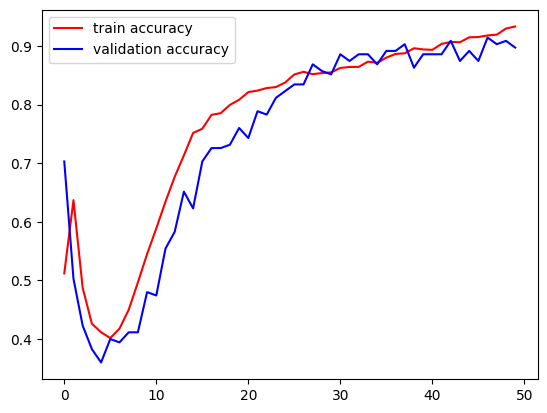

In [13]:
plt.plot(history.history['accuracy'],color='red',label='train accuracy')
plt.plot(history.history['val_accuracy'],color='blue',label='validation accuracy')
plt.legend()
plt.show()

Plotting the train and validata loss

---

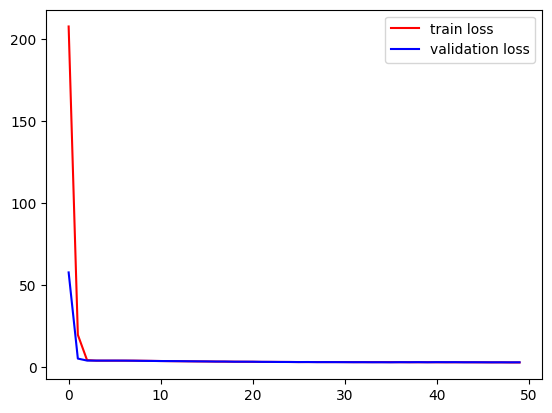

In [14]:
plt.plot(history.history['loss'],color='red',label='train loss')
plt.plot(history.history['val_loss'],color='blue',label='validation loss')
plt.legend()
plt.show()

Function to predict the waste material

---

In [15]:
output_class = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
def waste_prediction(new_image):
  img = tf.keras.preprocessing.image.load_img(new_image, target_size=(256, 256))
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)
  plt.axis("off")
  plt.imshow(img)
  plt.show()
  predictions = model.predict(img_array)
  value=output_class[np.argmax(predictions)]
  predicted_accuracy = round(np.max(predictions) * 100, 2)

  print("Your waste material is ", value, " with ", predicted_accuracy, " % accuracy")

Saving the model in hdf5 format

---

In [16]:
tf.keras.models.save_model(model,'my_model2.hdf5')


Installing streamlit for creating web apps

---

In [17]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 29.0 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=24e0a6b2fc6694bdc86f3b1293ebb6db5402d02c732ff31ab3f458ec49b19569
  Stored in directory: /root/.cache/pip/wheels/f2/ed/dd/d3a556ad245ef9dc570c6bcd2f22886d17b0b408dd3bbb9ac3
Successfully built validators
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzloca

Writing the predict function in a different python file

---

In [34]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st

@st.cache_resource     #(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/my_model2.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Waste Classification
         """
         )
file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])
#pip install opencv-python
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    size = (256,256)
    image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
    image = np.asarray(image)
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.

    img_reshape = img[np.newaxis,...]

    prediction = model.predict(img_reshape)

    return prediction

    print("Your waste material is ", value, " with ", predicted_accuracy, " % accuracy")
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    class_names = ["batteries", "clothes", "e-waste", "glass", "light blubs", "metal", "organic", "paper", "plastic"]
    score = tf.nn.softmax(predictions[0])
    string = 'This image is: '+class_names[np.argmax(predictions)]
    st.success(string)
    #st.write(predictions)
    #st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


Overwriting app.py


Deployment of the model using ngrok

---

In [19]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19867 sha256=6c085a0622ce72b7764642958653ca19e3adfb4bf172d7328cee596b4218640e
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [20]:
!ngrok authtoken 2ShhPkAssfCQxFMeUtMTE11GTrG_6LHLfyzcFYhKgcAP3QcGZ

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [35]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [29]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2023-07-19 10:35:49--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 52.202.168.65, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.28M  38.2MB/s    in 0.3s    

2023-07-19 10:35:49 (38.2 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13921656/13921656]



In [36]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [37]:
get_ipython().system_raw('./ngrok http 8501 &')

In [38]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
  'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'


Execute the next cell and the go to the following URL: https://c2d5-35-202-121-105.ngrok-free.app


In [39]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8502
  External URL: http://35.202.121.105:8502

  Stopping...
  Stopping...
